In [1]:
import pandas as pd
import time
from datetime import datetime
from pandas import Series
from matplotlib import pyplot
from matplotlib.pyplot import figure
import numpy as np

In [2]:
def take_range(data,col,M,m):
    return data[(data[col]>=m)&(data[col]<=M)]

## General Informations

In [3]:
manu_rules = pd.read_csv("manu_rules.csv")
print(manu_rules.info())
print(manu_rules.tail(1))
manu_rules.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
Unnamed: 0     460 non-null int64
objectId       460 non-null object
time           460 non-null object
timestamp      460 non-null float64
eventName      460 non-null object
eventNumber    460 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.2+ KB
None
     Unnamed: 0             objectId                 time     timestamp  \
459         459  nespresso_jolmilano  2018-07-03 17:29:13  1.530632e+12   

    eventName  eventNumber  
459   standby          200  


,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
0,0,nespresso_jolmilano,2018-06-27 17:38:48,1.530114e+12,heating,700


In [4]:
groundtruth = pd.read_csv("groudtruth.csv")
print(groundtruth.info())
print(groundtruth.tail(1))
groundtruth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
Unnamed: 0     16 non-null int64
objectId       16 non-null object
time           16 non-null object
timestamp      16 non-null float64
eventName      16 non-null object
eventNumber    16 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 616.0+ bytes
None
    Unnamed: 0                         objectId                 time  \
15          15  nespresso_jolmilano_groundtruth  2018-07-03 16:56:27   

       timestamp eventName  eventNumber  
15  1.530630e+12    coffee         1500  


,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
0,0,nespresso_jolmilano_groundtruth,2018-07-02 11:30:30,1.530524e+12,coffee,1500
1,1,nespresso_jolmilano_groundtruth,2018-07-02 11:30:38,1.530524e+12,on,500
2,2,nespresso_jolmilano_groundtruth,2018-07-02 15:03:40,1.530537e+12,on,500
3,3,nespresso_jolmilano_groundtruth,2018-07-02 15:04:21,1.530537e+12,coffee,1500
4,4,nespresso_jolmilano_groundtruth,2018-07-02 17:31:52,1.530546e+12,on,500


In [5]:
power = pd.read_csv("power.csv")
print(power.info())
print(power.tail(1))
power.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 4 columns):
Unnamed: 0      2357 non-null int64
Unnamed: 0.1    2357 non-null int64
time            2357 non-null object
value           2357 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 64.5+ KB
None
      Unnamed: 0  Unnamed: 0.1                 time     value
2356        2356          2356  2018-07-03 17:20:18  0.340937


,Unnamed: 0,Unnamed: 0.1,time,value
0,0,0,2018-07-03 00:00:00,0.000000
1,1,1,2018-07-03 00:07:37,0.292534
2,2,2,2018-07-03 00:07:40,0.000000
3,3,3,2018-07-03 00:15:31,0.278355
4,4,4,2018-07-03 00:15:34,0.000000


### How many coffee count?
Let see the differences between count coffee with power and with groundtruth

In [6]:
start = '2018-07-02 00:00:00'
end   = '2018-07-03 23:59:59'
print("coffe count based on manu rules="+str(manu_rules[(manu_rules["eventName"]=="coffee") & \
                                             (manu_rules['time']>=start) & (manu_rules['time']<=end)].count()))
print("coffe count based on groundtruth="+str(groundtruth[(groundtruth["eventName"]=="coffee")\
                                    & (groundtruth["time"]>=start) & (groundtruth["time"]<=end)].count()))
manu_rules[(manu_rules["eventName"]=="coffee") &(manu_rules['time']>=start) & (manu_rules['time']<=end)]

coffe count based on manu rules=Unnamed: 0     25
objectId       25
time           25
timestamp      25
eventName      25
eventNumber    25
dtype: int64
coffe count based on groundtruth=Unnamed: 0     9
objectId       9
time           9
timestamp      9
eventName      9
eventNumber    9
dtype: int64


,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
185,185,nespresso_jolmilano,2018-07-02 10:36:35,1.530521e+12,coffee,1500
188,188,nespresso_jolmilano,2018-07-02 10:36:56,1.530521e+12,coffee,1500
192,192,nespresso_jolmilano,2018-07-02 10:40:04,1.530521e+12,coffee,1500
248,248,nespresso_jolmilano,2018-07-02 12:19:33,1.530527e+12,coffee,1500
251,251,nespresso_jolmilano,2018-07-02 12:20:06,1.530527e+12,coffee,1500
253,253,nespresso_jolmilano,2018-07-02 12:20:21,1.530527e+12,coffee,1500
262,262,nespresso_jolmilano,2018-07-02 12:26:33,1.530527e+12,coffee,1500
265,265,nespresso_jolmilano,2018-07-02 12:27:19,1.530527e+12,coffee,1500
295,295,nespresso_jolmilano,2018-07-02 15:03:47,1.530537e+12,coffee,1500
297,297,nespresso_jolmilano,2018-07-02 15:04:11,1.530537e+12,coffee,1500


In [7]:
groundtruth[(groundtruth["eventName"]=="coffee")& (groundtruth["time"]>=start) & (groundtruth["time"]<=end)]

,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
0,0,nespresso_jolmilano_groundtruth,2018-07-02 11:30:30,1.530524e+12,coffee,1500
3,3,nespresso_jolmilano_groundtruth,2018-07-02 15:04:21,1.530537e+12,coffee,1500
5,5,nespresso_jolmilano_groundtruth,2018-07-02 17:32:12,1.530546e+12,coffee,1500
7,7,nespresso_jolmilano_groundtruth,2018-07-03 09:14:53,1.530602e+12,coffee,1500
8,8,nespresso_jolmilano_groundtruth,2018-07-03 09:18:04,1.530602e+12,coffee,1500
9,9,nespresso_jolmilano_groundtruth,2018-07-03 09:20:42,1.530602e+12,coffee,1500
11,11,nespresso_jolmilano_groundtruth,2018-07-03 11:04:06,1.530609e+12,coffee,1500
13,13,nespresso_jolmilano_groundtruth,2018-07-03 15:47:17,1.530626e+12,coffee,1500
15,15,nespresso_jolmilano_groundtruth,2018-07-03 16:56:27,1.530630e+12,coffee,1500


### Analyze power
Let see the data collected based on the power

In [10]:
#Different range of power
print("MAX=",max(power['value'])," - min=",min(power['value']))
print("different value of power="+str(len(power["value"].unique())))
print("[0]->",len(power[power['value']==0]))
incr = 50
i = 0
while(i<100):
    if(len(power[(power['value']>i*incr) &(power['value']<=(i+1)*incr)])>0):
        print("[",'%.2f'%(i*incr),"-",'%.2f'%((i+1)*incr),"])->",\
              len(power[(power['value']>i*incr) &(power['value']<=(i+1)*incr)]))
    i+=1

MAX= 1196.251721  - min= 0.0
different value of power=1321
[0]-> 535
[ 0.00 - 50.00 ])-> 1616
[ 50.00 - 100.00 ])-> 57
[ 100.00 - 150.00 ])-> 11
[ 150.00 - 200.00 ])-> 22
[ 200.00 - 250.00 ])-> 63
[ 250.00 - 300.00 ])-> 2
[ 300.00 - 350.00 ])-> 2
[ 350.00 - 400.00 ])-> 9
[ 400.00 - 450.00 ])-> 2
[ 450.00 - 500.00 ])-> 2
[ 500.00 - 550.00 ])-> 2
[ 550.00 - 600.00 ])-> 3
[ 600.00 - 650.00 ])-> 1
[ 650.00 - 700.00 ])-> 1
[ 700.00 - 750.00 ])-> 5
[ 800.00 - 850.00 ])-> 1
[ 850.00 - 900.00 ])-> 2
[ 900.00 - 950.00 ])-> 1
[ 950.00 - 1000.00 ])-> 1
[ 1000.00 - 1050.00 ])-> 1
[ 1050.00 - 1100.00 ])-> 2
[ 1100.00 - 1150.00 ])-> 10
[ 1150.00 - 1200.00 ])-> 6


# Power + Groundtruth (Energy)
Let's see the relationship between power and groundtruth calculating the average of power (it's mean ENERGY) in a intervall of coffe in groundtruth

### Average Energy to do a coffee

In [11]:
number_of_coffe = len(groundtruth[groundtruth['eventName']=='coffee'])
print("number of coffe in groudtruth=",number_of_coffe)
coffe      = groundtruth[groundtruth['eventName']=='coffee'].reset_index(drop=True)
coffe.head(1)

number of coffe in groudtruth= 9


,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
0,0,nespresso_jolmilano_groundtruth,2018-07-02 11:30:30,1.530524e+12,coffee,1500


In [12]:
before_s  = 4
after_s   = 8
average = 0
count   = 0
i       = 3 #perchè i primi 3 valori sono del giorno prima
while(i<number_of_coffe):
    date   = time.mktime(datetime.strptime(coffe['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
    start  = str(datetime.fromtimestamp(date-before_s))
    end    = str(datetime.fromtimestamp(date+after_s))
    
    sum_values = sum(power[(power['time']>=start)&(power['time']<=end)]['value'])
    tot_values = len(power[(power['time']>=start)&(power['time']<=end)]['value'])
    #print("sum=",sum_values,"values=",tot_values)
    average = average + sum_values/tot_values
    #print("average=",average)
    i += 1
    count += 1
average = average / count
print("Final Av=",average)

Final Av= 316.4249942083334


 ### Average Energy to turn on
 Average energy calculated when machine is turned on

In [11]:
number_of_on = len(groundtruth[groundtruth['eventName']=='on'])
print("number of turn on in groudtruth=",number_of_on)
turn_on      = groundtruth[groundtruth['eventName']=='on'].reset_index(drop=True)
turn_on.head(1)

number of turn on in groudtruth= 7


,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
0,1,nespresso_jolmilano_groundtruth,2018-07-02 11:30:38,1.530524e+12,on,500


In [86]:
before_s  = 4
after_s   = 8
average = 0
count   = 0
i       = 3  #perchè i primi 3 valori sono del giorno prima
while(i<number_of_on):
    date   = time.mktime(datetime.strptime(turn_on['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
    start  = str(datetime.fromtimestamp(date-before_s))
    end    = str(datetime.fromtimestamp(date+after_s))
    
    sum_values = sum(power[(power['time']>=start)&(power['time']<=end)]['value'])
    tot_values = len(power[(power['time']>=start)&(power['time']<=end)]['value'])
    #print("sum=",sum_values,"values=",tot_values)
    average = average + sum_values/tot_values
    #print("average=",average)
    i += 1
    count += 1
average = average / count
print("Final Av=",average)

Final Av= 1097.5067119583332


## Power graphics

In [13]:
power.head()

,Unnamed: 0,Unnamed: 0.1,time,value
0,0,0,2018-07-03 00:00:00,0.000000
1,1,1,2018-07-03 00:07:37,0.292534
2,2,2,2018-07-03 00:07:40,0.000000
3,3,3,2018-07-03 00:15:31,0.278355
4,4,4,2018-07-03 00:15:34,0.000000


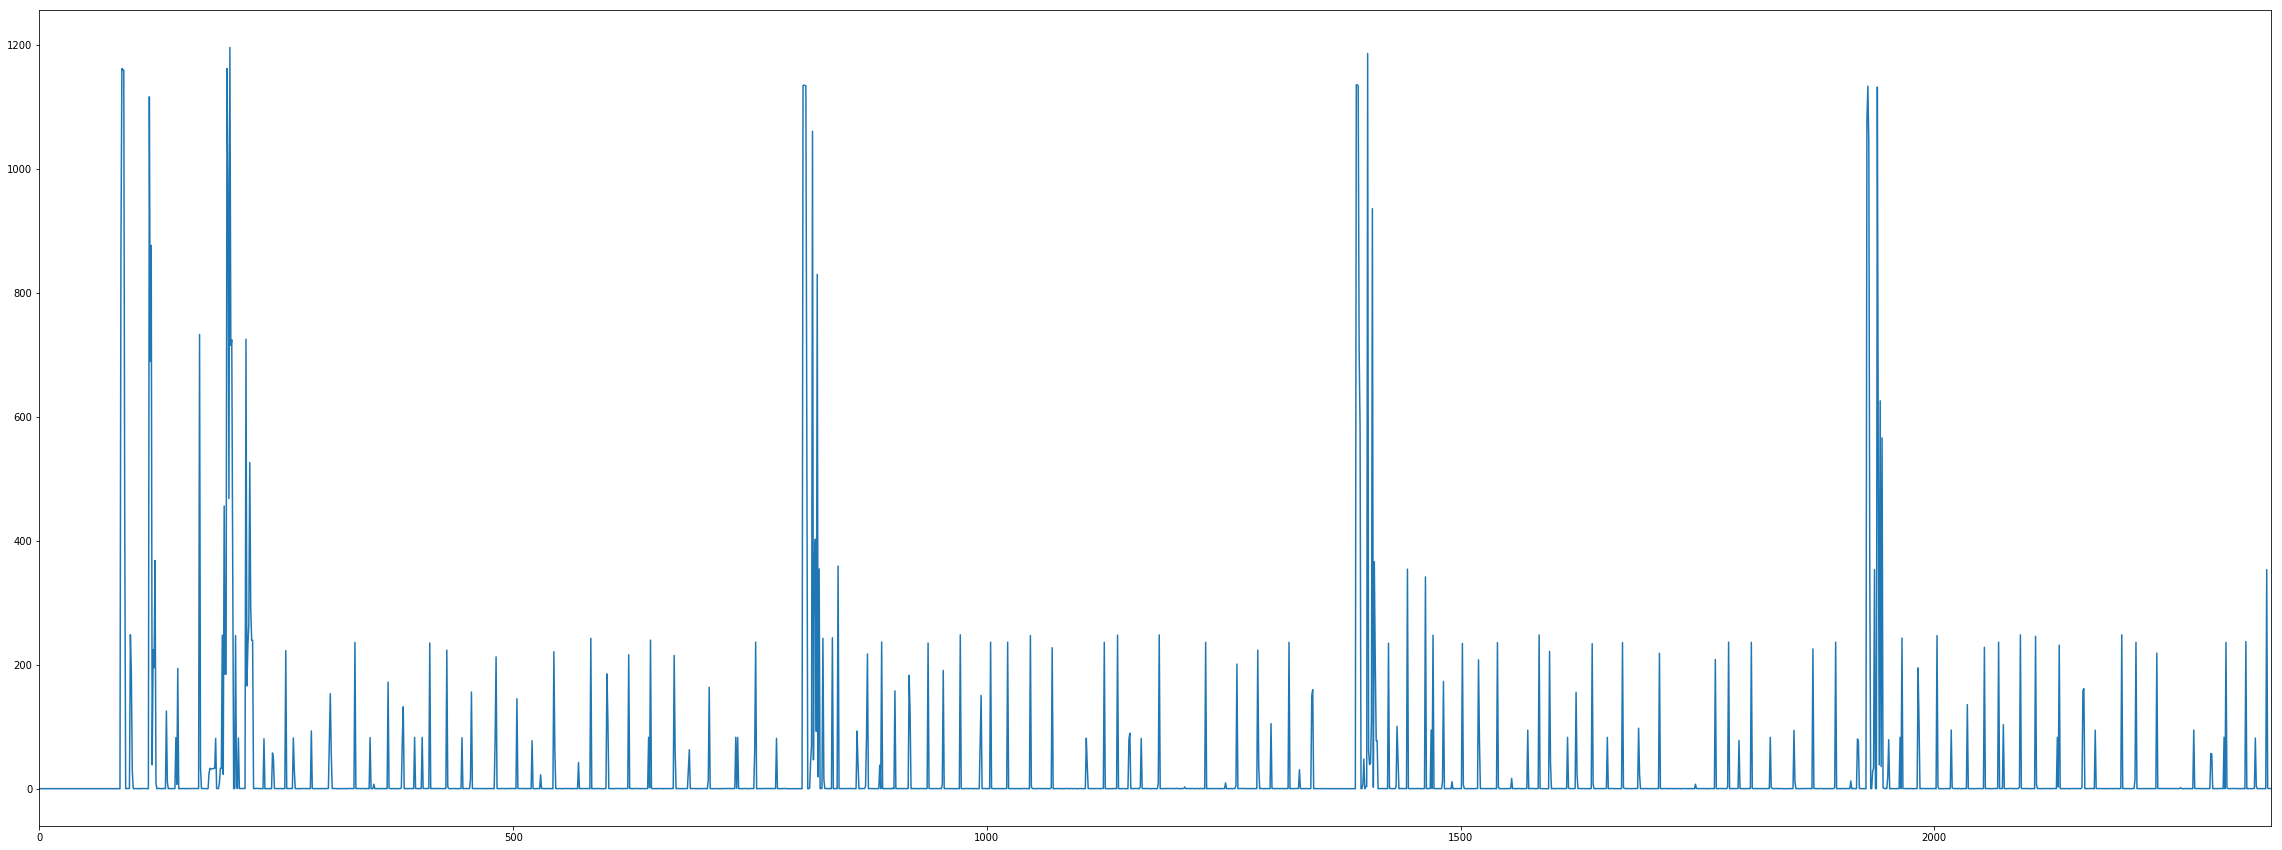

In [14]:
series = Series.from_array(power['value'])
date   = Series.from_array(power['time'])
pyplot.figure(figsize=(40, 15))
series.plot()
pyplot.show()

## Draw some graphics
Draw some graphics around coffee and on 

2018-07-03 09:14:03 2018-07-03 09:15:43


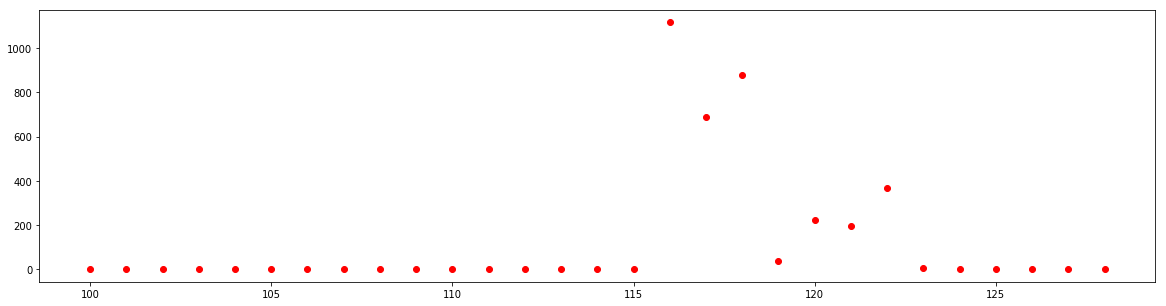

2018-07-03 09:17:14 2018-07-03 09:18:54


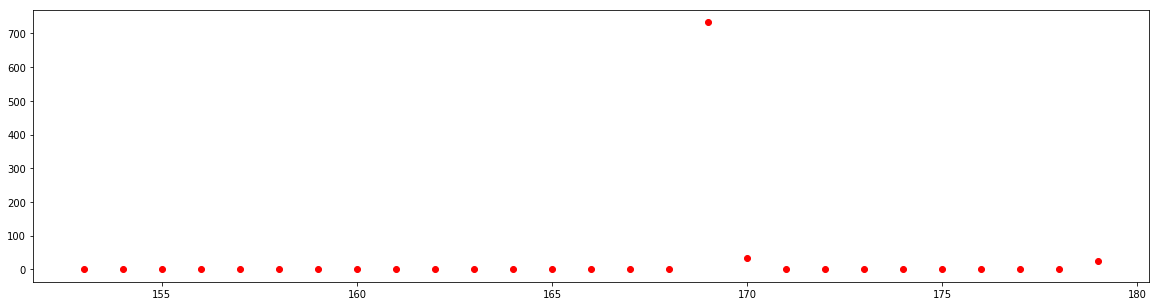

2018-07-03 09:19:52 2018-07-03 09:21:32


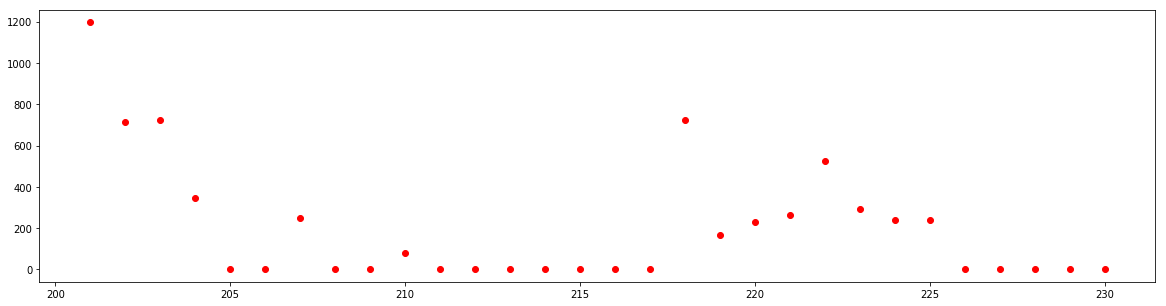

2018-07-03 11:03:16 2018-07-03 11:04:56


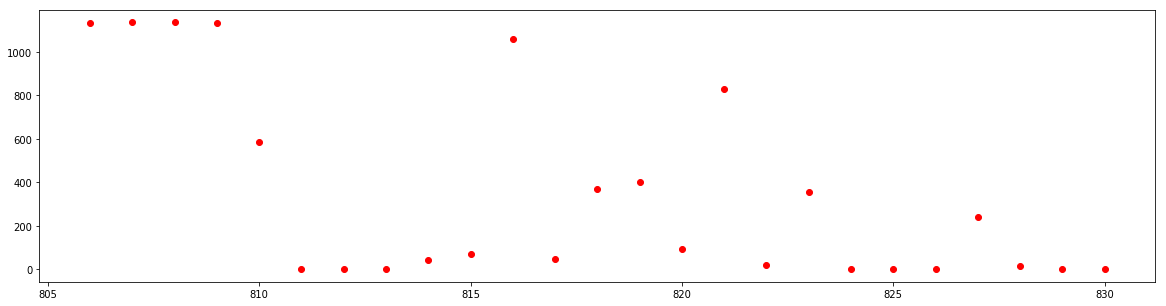

2018-07-03 15:46:27 2018-07-03 15:48:07


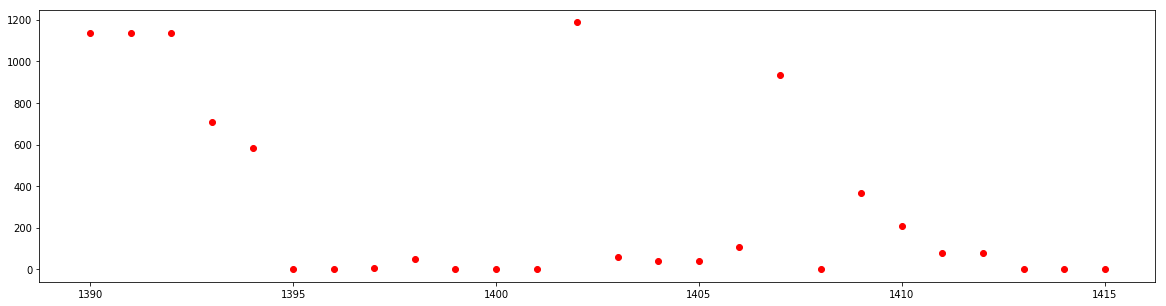

2018-07-03 16:55:37 2018-07-03 16:57:17


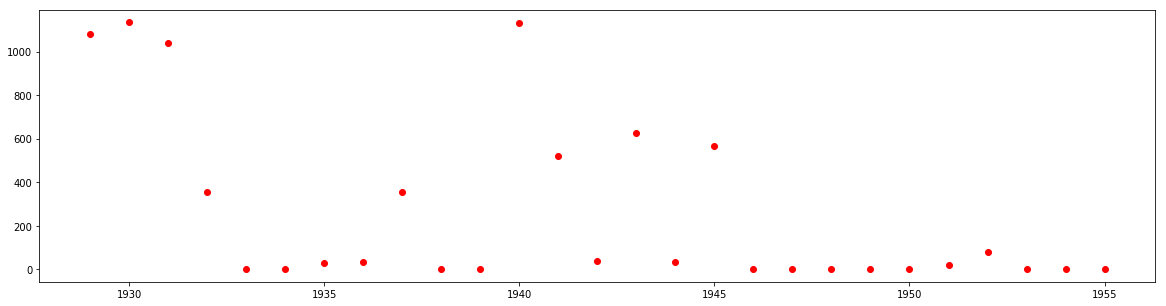

In [65]:
#around coffee
before_s  = 50
after_s   = 50
average = 0
count   = 0
i       = 3 #perchè i primi 3 valori sono del giorno prima
coffe_index = []
while(i<number_of_coffe):
    count += 1
    date   = time.mktime(datetime.strptime(coffe['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
    start  = str(datetime.fromtimestamp(date-before_s))
    end    = str(datetime.fromtimestamp(date+after_s))
    print(start,end)
    i += 1
    serie = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['value'])
    pyplot.figure(figsize=(20, 5))
    pyplot.plot(serie,'ro')
    pyplot.show()
    coffe_index.append(serie.index[int(len(serie)/2)])

1530601999.0 2018-07-03 09:12:29 2018-07-03 09:14:09


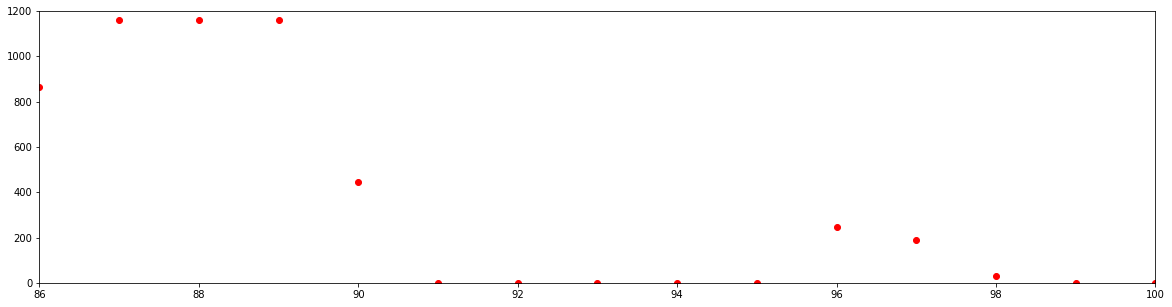

1530608620.0 2018-07-03 11:02:50 2018-07-03 11:04:30


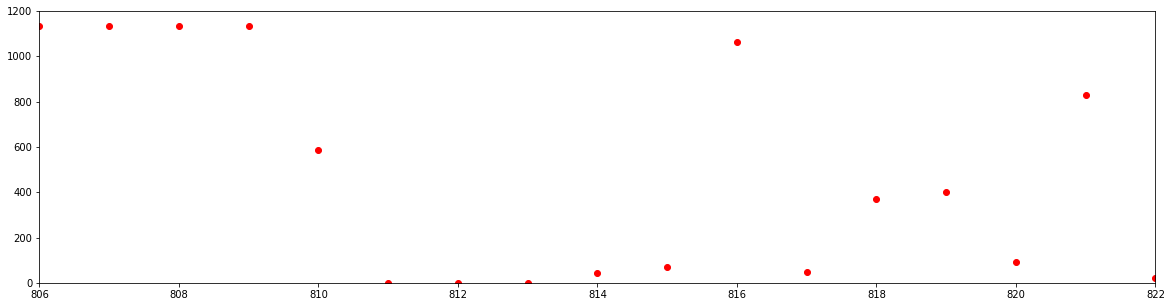

1530625597.0 2018-07-03 15:45:47 2018-07-03 15:47:27


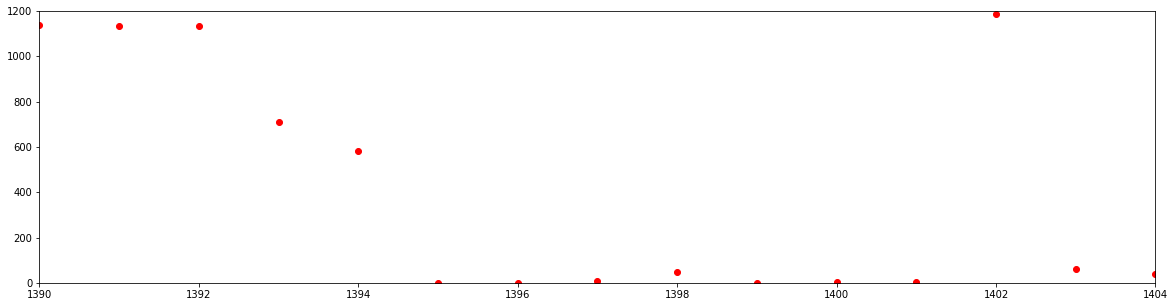

1530629755.0 2018-07-03 16:55:05 2018-07-03 16:56:45


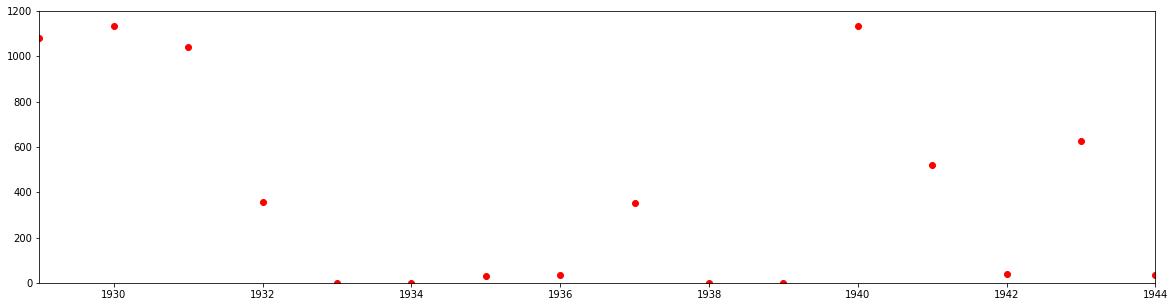

In [66]:
#around turn_on
before_s  = 50
after_s   = 50
average = 0
count   = 0
i       = 3  #perchè i primi 3 valori sono del giorno prima
turn_on_index = []
while(i<number_of_on):
    date   = time.mktime(datetime.strptime(turn_on['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
    start  = str(datetime.fromtimestamp(date-before_s))
    end    = str(datetime.fromtimestamp(date+after_s))
    print(date,start,end)
    i += 1
    serie = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['value'])
    date = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['time'])
    v = [serie.index[0], serie.index[len(serie)-1], 0, 1200]#xmin,xmax,ymin,ymax
    pyplot.figure(figsize=(20, 5))
    pyplot.plot(serie,'ro')
    pyplot.axis(v)
    pyplot.show()
    turn_on_index.append(serie.index[int(len(serie)/2)])

In [81]:
turn_on.loc[3:8]

,Unnamed: 0,objectId,time,timestamp,eventName,eventNumber
3,6,nespresso_jolmilano_groundtruth,2018-07-03 09:13:19,1.530602e+12,on,500
4,10,nespresso_jolmilano_groundtruth,2018-07-03 11:03:40,1.530609e+12,on,500
5,12,nespresso_jolmilano_groundtruth,2018-07-03 15:46:37,1.530626e+12,on,500
6,14,nespresso_jolmilano_groundtruth,2018-07-03 16:55:55,1.530630e+12,on,500


### Power graphics divided in part

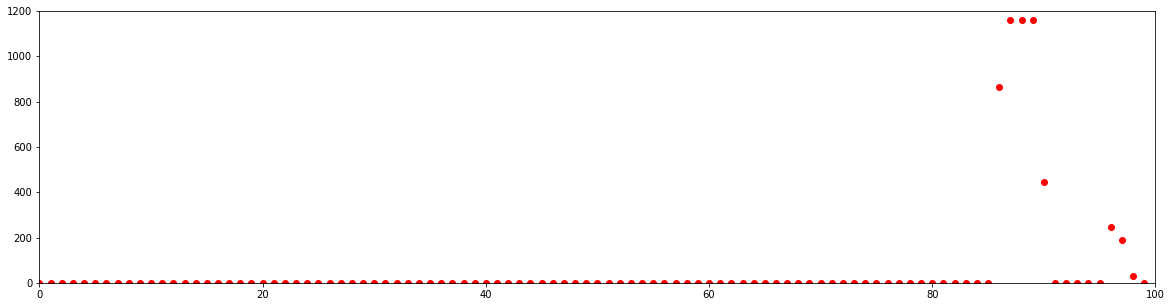

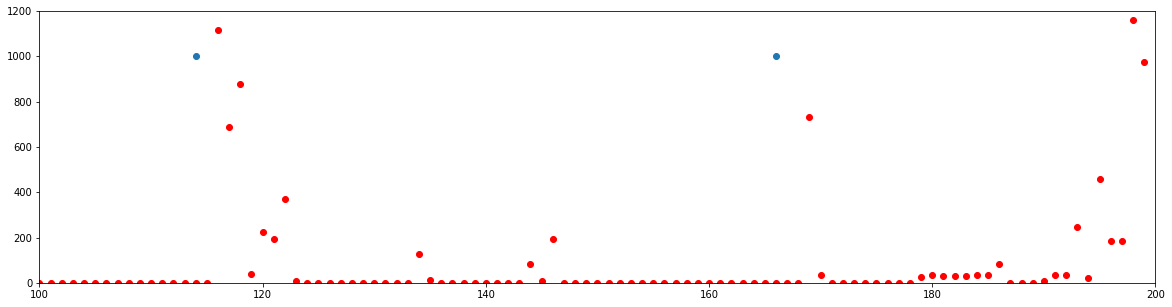

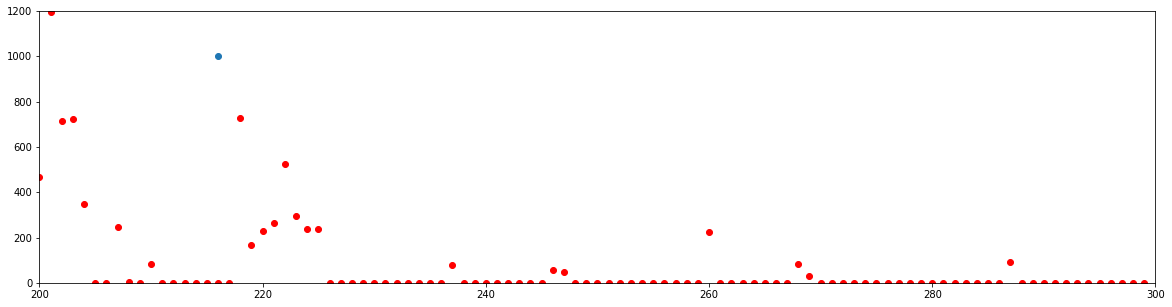

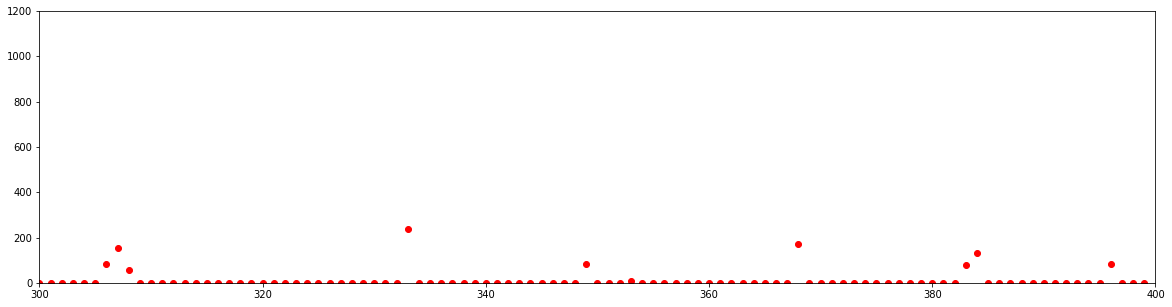

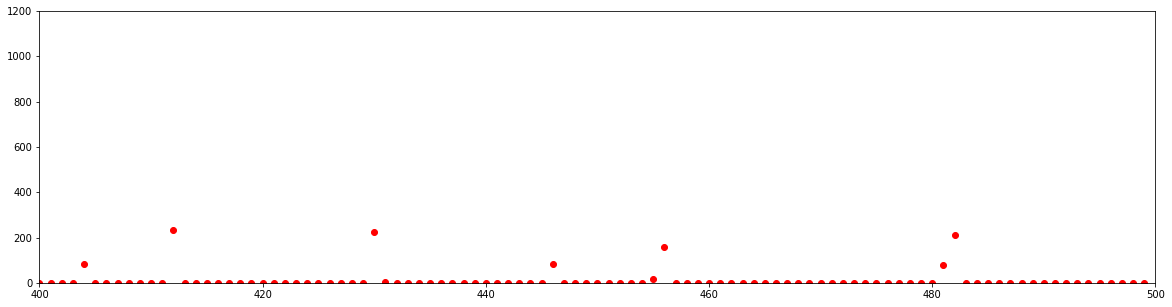

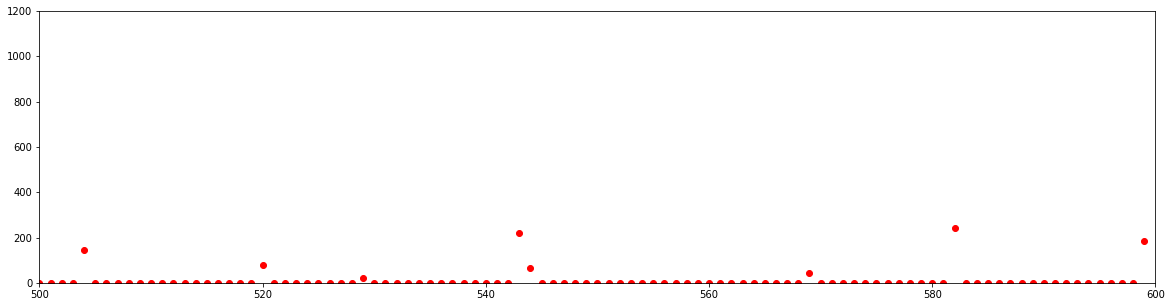

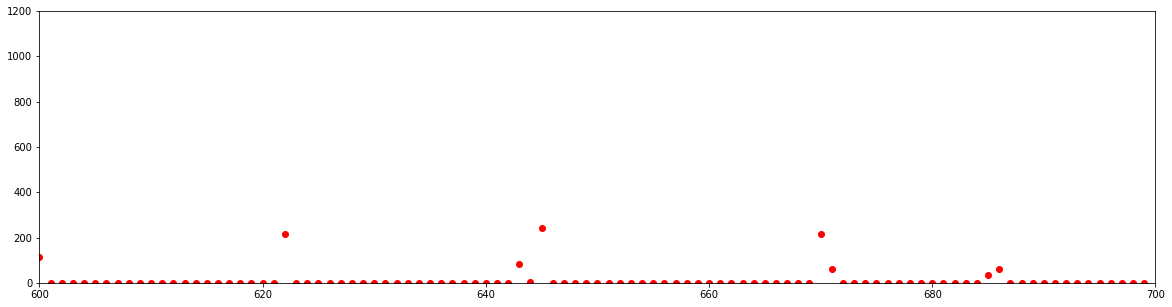

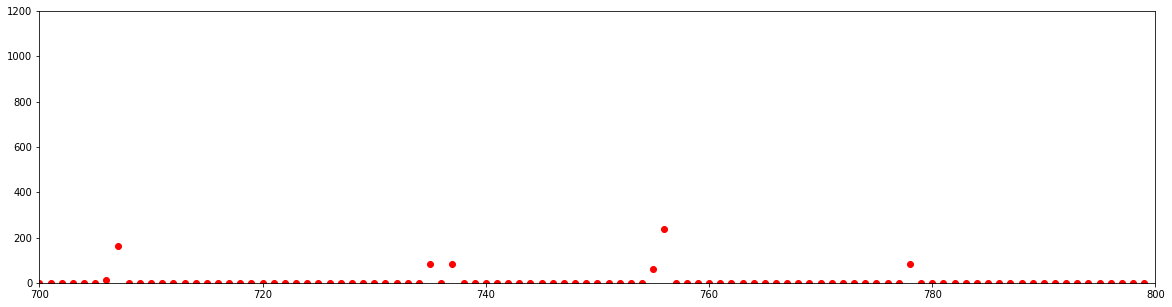

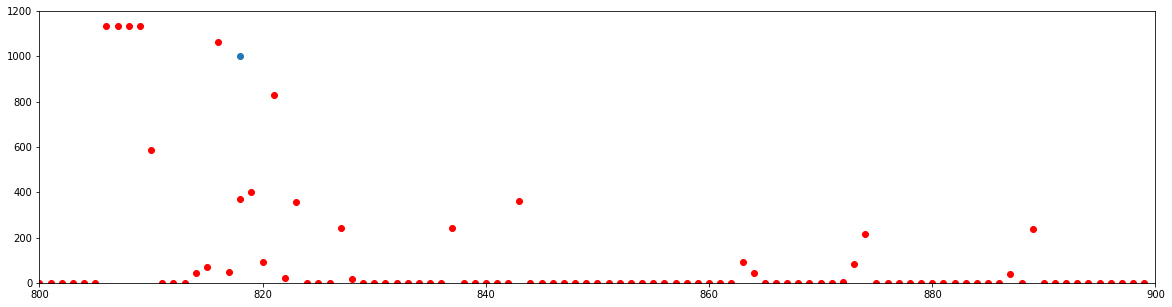

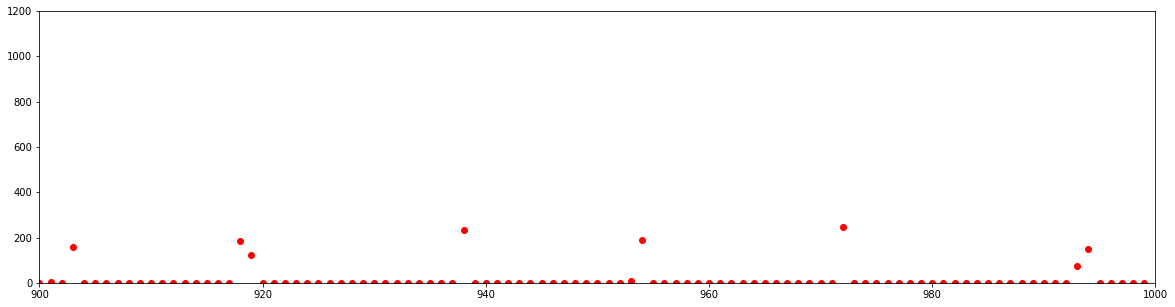

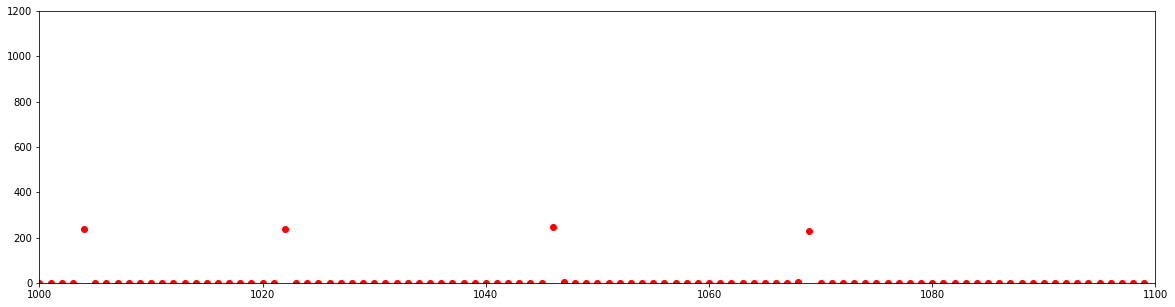

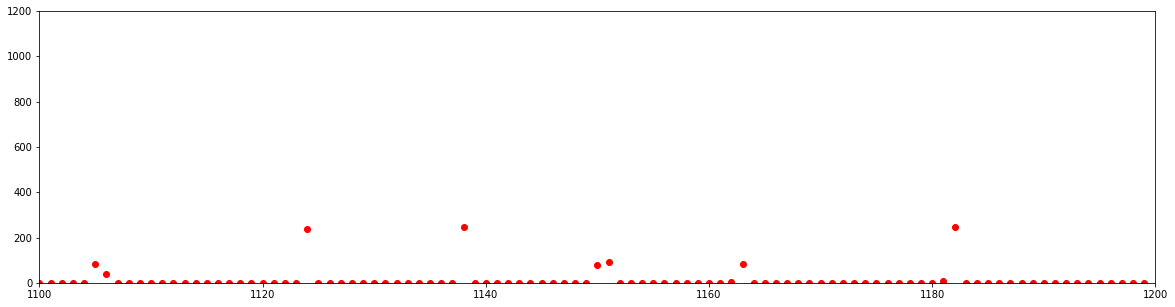

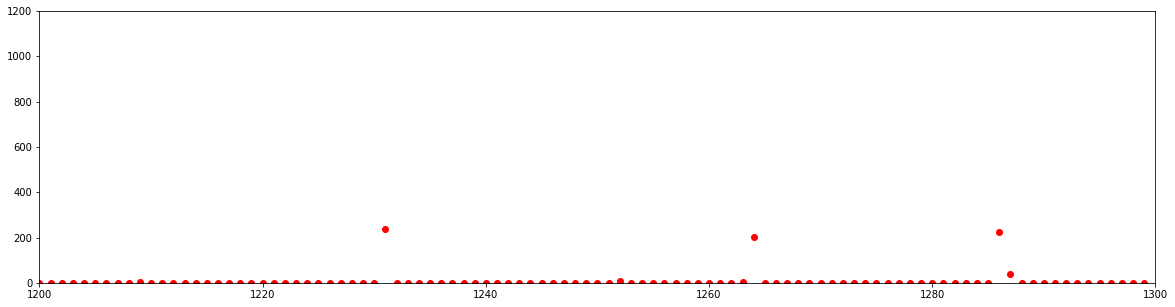

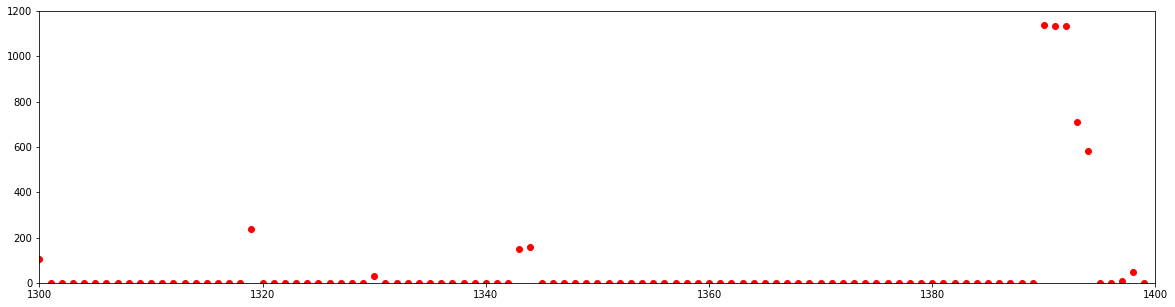

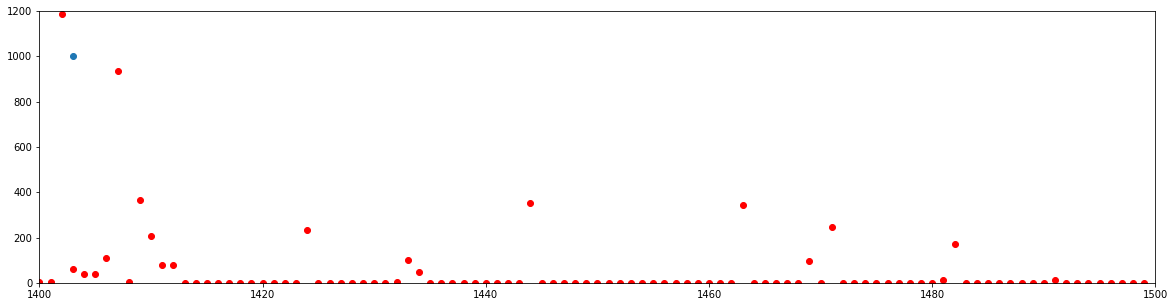

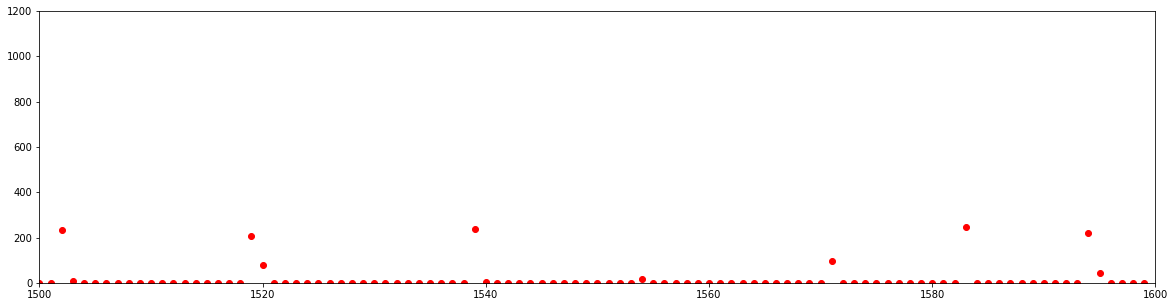

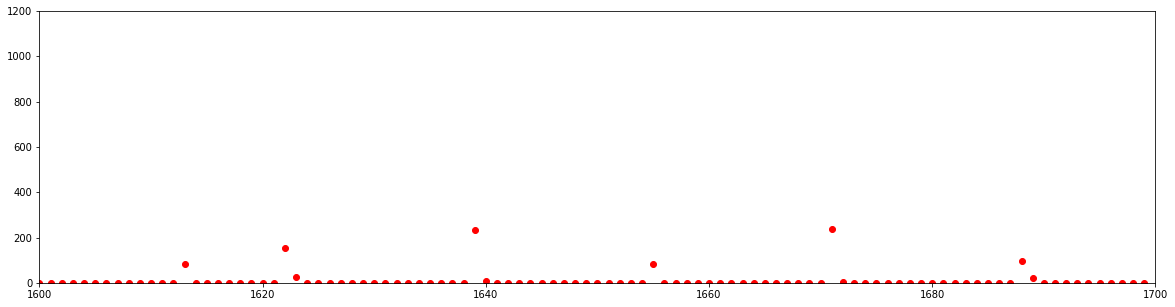

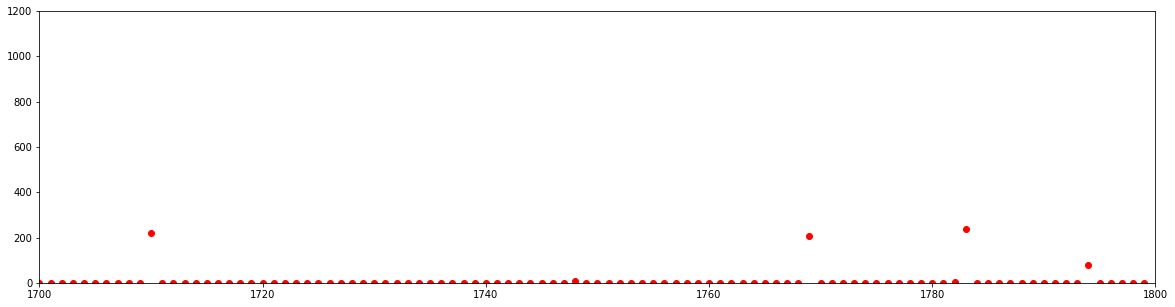

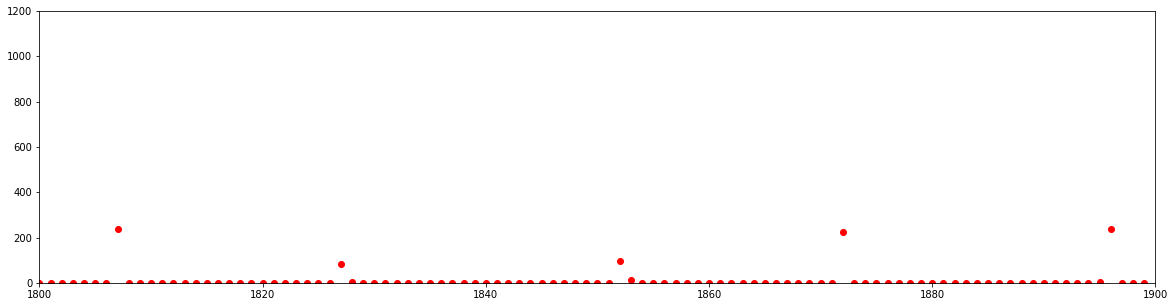

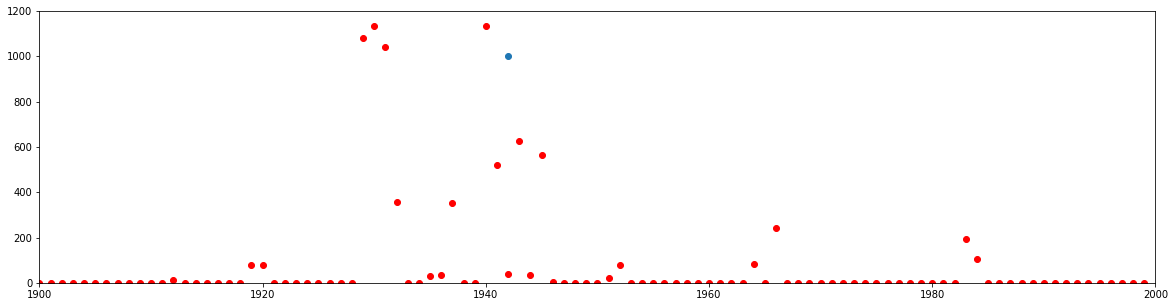

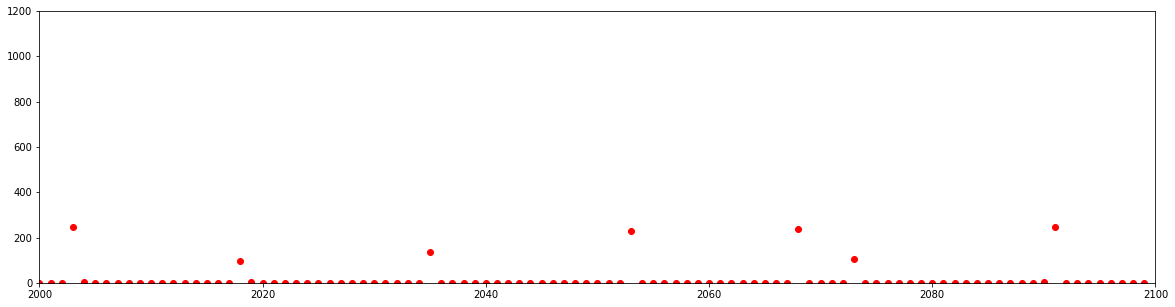

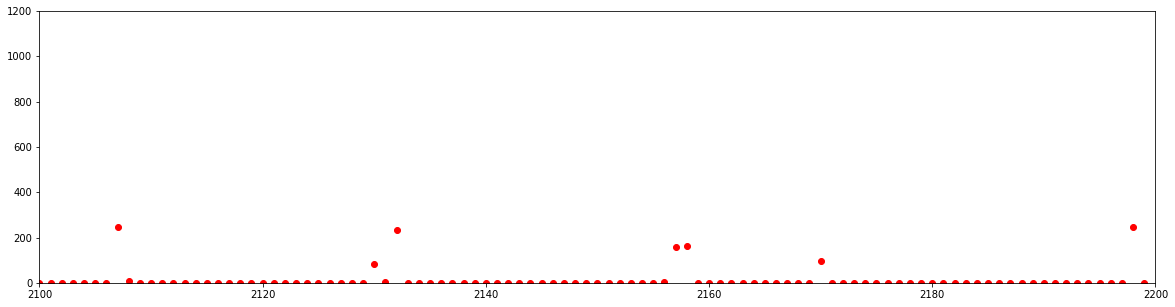

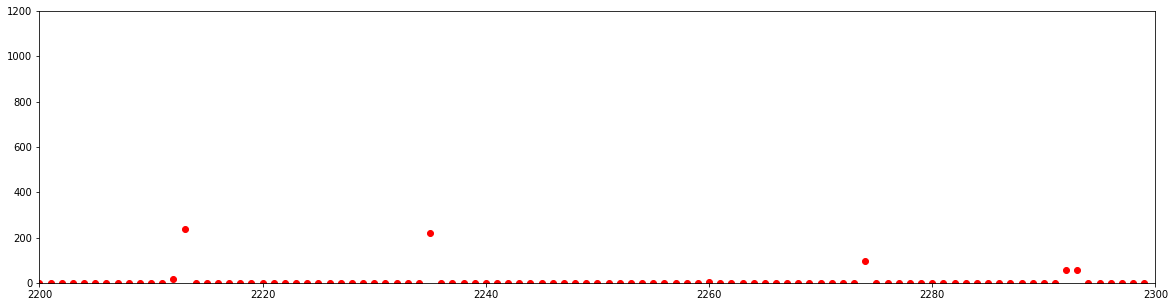

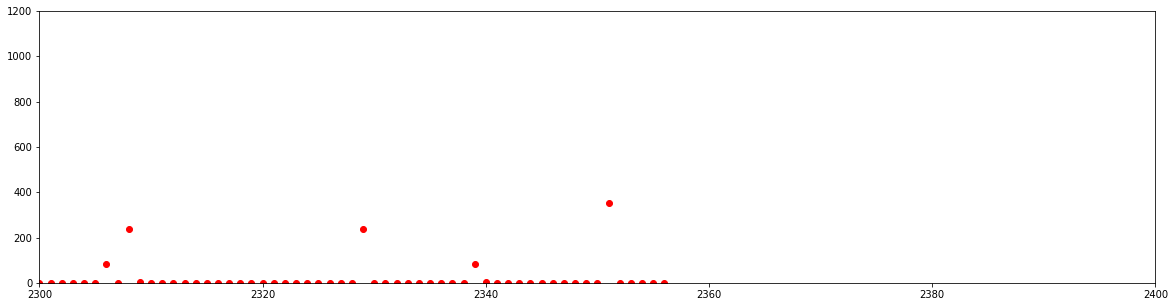

In [97]:
band = 100
i    = 0
series = Series.from_array(power[power['time']>='2018-07-03 00:00:00']['value'])
while(i*band<len(series)):
    pyplot.figure(figsize=(20, 5))
    pyplot.plot(series[i*band:(i+1)*band],'ro')
    v = [i*band, (i+1)*band, 0, 1200]
    pyplot.axis(v)
    v = [serie.index[0], serie.index[len(serie)-1], 0, 1200]#xmin,xmax,ymin,ymax
    pyplot.scatter(coffe_index,[1000]*len(coffe_index),marker=(0, 3))
    pyplot.show()
    i += 1

In [8]:
#around turn_on
before_s  = 50
after_s   = 50
average = 0
count   = 0
i       = 3  #perchè i primi 3 valori sono del giorno prima
while(i<4):
    date   = time.mktime(datetime.strptime(turn_on['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
    start  = str(datetime.fromtimestamp(date-before_s))
    end    = str(datetime.fromtimestamp(date+after_s))
    print(date,start,end)
    i += 1
    serie = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['value'])
    date = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['time'])
    v = [serie.index[0], serie.index[len(serie)-1], 0, 1200]#xmin,xmax,ymin,ymax
    pyplot.figure(figsize=(20, 5))
    pyplot.plot(serie,'ro')
    #plt.scatter(x, y, s=80, c=z, marker=(5, 0))
    pyplot.scatter([90],[600],marker=(0, 3))
    pyplot.axis(v)
    pyplot.show()

NameError: name 'turn_on' is not defined

c:\users\angelo\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


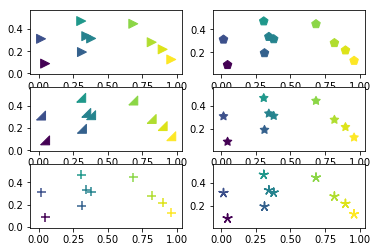

In [25]:
x = np.random.rand(10)
y = np.random.rand(10)
z = np.sqrt(x**2 + y**2)

pyplot.subplot(321)
pyplot.scatter(x, y, s=80, c=z, marker=">")

pyplot.subplot(322)
pyplot.scatter(x, y, s=80, c=z, marker=(5, 0))

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
pyplot.subplot(323)
pyplot.scatter(x, y, s=80, c=z, marker=(verts, 0))
# equivalent:
# plt.scatter(x, y, s=80, c=z, marker=None, verts=verts)

pyplot.subplot(324)
pyplot.scatter(x, y, s=80, c=z, marker=(5, 1))

pyplot.subplot(325)
pyplot.scatter(x, y, s=80, c=z, marker='+')

pyplot.subplot(326)
pyplot.scatter(x, y, s=80, c=z, marker=(5, 2))

pyplot.show()

# Class with the function we use above
Group of methods in python to analyze the data

In [34]:
%%writefile analyze_data.py

import pandas as pd
import time
from datetime import datetime
from pandas import Series
from matplotlib import pyplot
from matplotlib.pyplot import figure
import numpy as np

def draw_power_graphics(power,sp=None,before=None,after=None,band=100):
    """
    Draw different graphics for the power (the number of graphics depend of how many
    data are included in the power and the value of band)
    power  : dataframe with the values of the power 
    sp     : array of [array of x, array of y] array 3D with the points we 
            want highlight in the graphics with different colors
    before : we want to consider only the value before a certain date
    after  : we want to consider only the value after a certain date
    band   : how many values of power we want draw in each graphics
    --------------------------------------------------------
    Note: this method use the 'time' and 'value' columns and the date must be passed
        in this format -> %Y-%m-%d %H:%M:%S
    """
    i    = 0
    tmp_power = power.copy()
    if before!=None:
        tmp_power = tmp_power[tmp_power['time']<=before]
    if after!=None:
        tmp_power = tmp_power[tmp_power['time']>=after]
    serie = Series.from_array(tmp_power['value'])
    while(i*band<len(serie)):
        pyplot.figure(figsize=(20, 5))
        pyplot.plot(serie[i*band:(i+1)*band],'ro')
        v = [i*band, (i+1)*band, 0, 1200]
        pyplot.axis(v)
        v = [serie.index[0], serie.index[len(serie)-1], 0, 1200]#xmin,xmax,ymin,ymax
        if sp != None:
            j = 0
            while j<len(sp):
                pyplot.scatter(sp[j][0],sp[j][1],marker=(0, 3))
                j += 1
        pyplot.show()
        i += 1
    
def draw_around_event(power,events,borders,eventName,maxY=1200):
    """
    Draw different graphics for each event saved in events dataframe. 
    In each graphics is drawn the levels of power around the event
    power     : dataframe with the values of the power 
    events    : dataframe with the events (and respective datetime)
    borders   : [min,MAX] how many seconds before and after the events we want to
                consider in the graphics
    eventName : name of the event we want consider for the graphics
    maxY      : the max Y value of power we in the Cartesian axis
    --------------------------------------------------------
    Note: this method use the 'time' and 'value' columns and the date must be passed
        in this format -> %Y-%m-%d %H:%M:%S
    """
    event_consider = events[events['eventName']==eventName].reset_index(drop=True)
    print("number of", eventName ,"in groudtruth=",len(event_consider))
    i     = 0
    while(i<len(event_consider)):
        date   = time.mktime(datetime.strptime(event_consider['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
        start  = str(datetime.fromtimestamp(date-borders[0]))
        end    = str(datetime.fromtimestamp(date+borders[1]))
        print(date,start,end)
        i += 1
        serie = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['value'])
        if len(serie)>0:
            v = [serie.index[0], serie.index[len(serie)-1], 0, maxY]#xmin,xmax,ymin,ymax
            pyplot.figure(figsize=(20, 5))
            pyplot.plot(serie,'ro')
            pyplot.axis(v)
            pyplot.show()
        else:
            print("No data of power for this event")
    
def average_energy(power,events,borders,eventName):
    """
    Return, and print, the average of energy used during the event which we are
    interesting (example: eventName="coffee")
    power     : dataframe with the values of the power 
    events    : dataframe with the events (and respective datetime)
    borders   : [min,MAX] how many seconds before and after the events we want to
                consider in the graphics
    eventName : name of the event we want consider for the graphics
    --------------------------------------------------------
    Note: this method use the 'time' and 'value' columns and the date must be passed
        in this format -> %Y-%m-%d %H:%M:%S
    """
    event_consider = events[events['eventName']==eventName].reset_index(drop=True)
    average   = 0
    i          = 0
    count      = 0
    minValue   = 10000
    maxValue   = 0
    minAverage = 10000
    maxAverage = 0  
    while(i<len(event_consider)):
        date   = time.mktime(datetime.strptime(event_consider['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
        start  = str(datetime.fromtimestamp(date+borders[0]))
        end    = str(datetime.fromtimestamp(date+borders[1]))
        values = power[(power['time']>=start)&(power['time']<=end)]['value']
        sum_values = sum(values)
        tot_values = len(values)
        if tot_values>0:
            if values.max() > maxValue:
                maxValue = values.max()
            if values.min() < minValue:
                minValue = values.min()
            if sum_values/tot_values > maxAverage:
                maxAverage = sum_values/tot_values
            if sum_values/tot_values < minAverage:
                minAverage = sum_values/tot_values
            average = average + sum_values/tot_values
            count += 1
        i += 1
    if count>0:
        average = average / count
        print("number of", eventName ,"in groudtruth and power=",count)
        print("minValue=",minValue,"maxValue=",maxValue)
        print("minAverage=",minAverage,"maxAverage=",maxAverage)
        print("Final Av=",average)
        return average
    else:
        print("Not values found in the range")

def get_special_point(power,events,borders,eventName,numericValue):
    """
    Return, and print, the average of energy used during the event which we are
    interesting (example: eventName="coffee")
    power        : dataframe with the values of the power
    events       : dataframe with the events (and respective datetime)
    borders      : [min,MAX] how many seconds before and after the events we want to
                  consider in the graphics
    eventName    : name of the event we want consider for the graphics
    numericValue : value we want to give in the Y axis for each event
    --------------------------------------------------------
    Note: this method use the 'time' and 'value' columns and the date must be passed
        in this format -> %Y-%m-%d %H:%M:%S
    """
    event_consider = events[events['eventName']==eventName].reset_index(drop=True)
    #around turn_on
    i    = 0  
    count = 0
    event_index = []
    while(i<len(event_consider)):
        date   = time.mktime(datetime.strptime(event_consider['time'][i], "%Y-%m-%d %H:%M:%S").timetuple())
        start  = str(datetime.fromtimestamp(date-borders[0]))
        end    = str(datetime.fromtimestamp(date+borders[1]))
        serie = Series.from_array(power[(power['time']>=start)&(power['time']<=end)]['value'])
        if len(serie)>0:
            event_index.append(serie.index[int(len(serie)/2)])
            count += 1
        i += 1
    print("number of", eventName ,"in groudtruth and power=",count)
    return event_index,[numericValue]*len(event_index)

''' Exaple 1
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp = get_special_point(groundtruth,[10,10],"coffee",1000)
print(sp)
draw_power_graphics(power,sp,band=2500)
average_energy(power,groundtruth,[10,10],"on")
draw_around_event(power,groundtruth,[10,10],"coffee")
'''

''' Exaple 2
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp = get_special_point(groundtruth,[10,10],"coffee",1000)
sp_2 = get_special_point(groundtruth,[10,10],"on",1000)
draw_power_graphics(power,[sp,sp_2],band=2500)
'''

power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp1 = get_special_point(power,groundtruth,[7,7],"coffee",1000)
sp2 = get_special_point(power,groundtruth,[7,7],"on",1000)
print("-"*20,"ENERGY FOR ON","-"*20)
average_energy(power,groundtruth,[-7,7],"on")
print("-"*20,"ENERGY FOR COFFEE","-"*20)
average_energy(power,groundtruth,[-7,7],"coffee")
print("-"*20,"ENERGY AFTER COFFEE","-"*20)
average_energy(power,groundtruth,[7,21],"coffee")
print("-"*20,"ENERGY AFTER ON","-"*20)
average_energy(power,groundtruth,[7,21],"on")
print("-"*20,"ENERGY BEFORE COFFEE","-"*20)
average_energy(power,groundtruth,[-21,-7],"coffee")
print("-"*20,"ENERGY BEFORE ON","-"*20)
average_energy(power,groundtruth,[-21,-7],"on")

draw_power_graphics(power,[sp1,sp2],band=2500)
#draw_around_event(power,groundtruth,[10,10],"coffee")

Overwriting analyze_data.py


In [28]:
start = "2018-07-03 09:12:58"
end   = "2018-07-03 09:13:12"
power[(power['time']>=start)&(power['time']<=end)]['value']

Series([], Name: value, dtype: float64)

In [33]:
start = "2018-07-03 16:55:34"
end   = "2018-07-03 09:15:00"
power[power['value']==0]

,Unnamed: 0,Unnamed: 0.1,time,value
0,0,0,2018-07-03 00:00:00,0.0
2,2,2,2018-07-03 00:07:40,0.0
4,4,4,2018-07-03 00:15:34,0.0
6,6,6,2018-07-03 00:37:46,0.0
7,7,7,2018-07-03 01:00:00,0.0
9,9,9,2018-07-03 01:33:40,0.0
11,11,11,2018-07-03 01:38:57,0.0
13,13,13,2018-07-03 01:43:06,0.0
14,14,14,2018-07-03 02:00:01,0.0
16,16,16,2018-07-03 02:02:53,0.0


In [1]:
from analyze_data import *

number of coffee in groudtruth and power= 6
number of on in groudtruth and power= 4


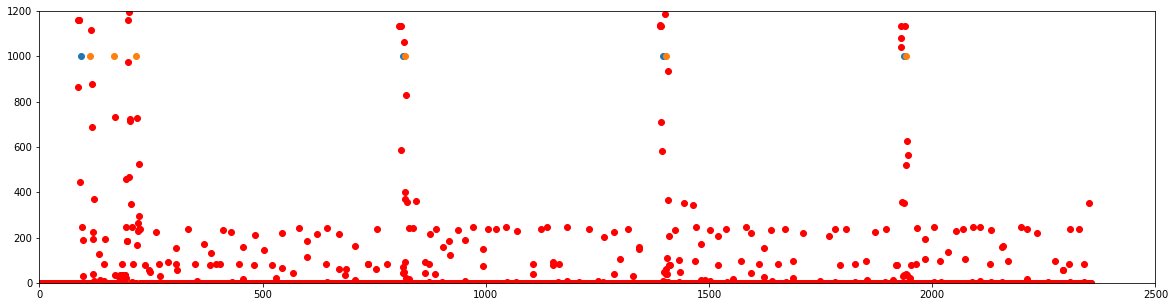

In [2]:
power = pd.read_csv("power.csv")
groundtruth = pd.read_csv("groudtruth.csv")
sp2 = get_special_point(power,groundtruth,[50,50],"coffee",1000)
sp = get_special_point(power,groundtruth,[50,50],"on",1000)
draw_power_graphics(power,[sp,sp2],band=2500)

In [123]:
event_consider = groundtruth[groundtruth['eventName']=="coffee"].reset_index(drop=True)

In [145]:
l = [1,2,3]
l.extend([4,5,6])
l

[1, 2, 3, 4, 5, 6]

In [147]:
sp = get_special_point(groundtruth,[50,50],"on",1000)

number of on in groudtruth= 7


In [150]:
sp[0].extend([1,2])

In [157]:
sp = get_special_point(groundtruth,[10,10],"coffee",1000)
sp_2 = get_special_point(groundtruth,[10,10],"on",1000)
[sp,sp_2]

number of coffee in groudtruth= 9
number of on in groudtruth= 7


[([87, 115, 167], [1000, 1000, 1000]), ([87], [1000])]

In [156]:
len(sp)

2